In [1]:
#The first step is to import the libraries

import yfinance as yf
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from datetime import datetime

In [2]:
#Define a function to fetch the options data for a given ticker symbol

def fetch_options_data(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    options_dates = ticker.options
    # We'll use the nearest expiry date for our analysis
    options_data = ticker.option_chain(options_dates[0])
    return options_data.calls, options_data.puts

In [3]:
#I chose NVDA.

nvda_calls, nvda_puts = fetch_options_data('NVDA')

In [4]:
#Here is the data for put option 
#I doubled check if the data below is the most recent one and it was.
#European put option allows the holder to sell the underlying security at expiry.

nvda_puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NVDA250214P00050000,2025-02-05 19:12:16+00:00,50.0,0.01,0.00,0.01,0.0,0.0,3.0,1269,2.187505,False,REGULAR,USD
1,NVDA250214P00055000,2025-02-05 16:23:20+00:00,55.0,0.01,0.00,0.01,0.0,0.0,5.0,4334,1.937500,False,REGULAR,USD
2,NVDA250214P00060000,2025-02-05 14:42:50+00:00,60.0,0.01,0.00,0.01,0.0,0.0,2000.0,5345,1.750001,False,REGULAR,USD
3,NVDA250214P00065000,2025-02-07 20:56:29+00:00,65.0,0.01,0.00,0.01,0.0,0.0,2089.0,10793,1.593752,False,REGULAR,USD
4,NVDA250214P00070000,2025-02-07 20:13:45+00:00,70.0,0.01,0.00,0.01,0.0,0.0,1754.0,31349,1.437503,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,NVDA250214P00200000,2025-01-24 16:01:49+00:00,200.0,55.00,69.70,71.85,0.0,0.0,5.0,0,1.769532,True,REGULAR,USD
79,NVDA250214P00210000,2025-01-27 14:36:58+00:00,210.0,83.25,79.55,81.85,0.0,0.0,NaN,0,1.878907,True,REGULAR,USD
80,NVDA250214P00235000,2025-01-27 14:49:24+00:00,235.0,107.95,104.55,107.40,0.0,0.0,NaN,0,2.380863,True,REGULAR,USD
81,NVDA250214P00250000,2025-01-23 14:32:14+00:00,250.0,106.00,119.55,121.85,0.0,0.0,1.0,0,2.398442,True,REGULAR,USD


In [5]:
#Here is the data of call option 
#European call option allows the holder to buy the underlying security at expiry.
nvda_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NVDA250214C00050000,2025-02-07 20:48:51+00:00,50.0,79.42,79.25,80.50,5.220001,7.035042,101,276,2.593754,True,REGULAR,USD
1,NVDA250214C00055000,2025-02-04 18:26:50+00:00,55.0,64.29,74.10,75.85,0.000000,0.000000,2,114,2.757816,True,REGULAR,USD
2,NVDA250214C00060000,2025-02-06 18:24:40+00:00,60.0,68.40,69.15,70.85,0.000000,0.000000,10,51,2.558597,True,REGULAR,USD
3,NVDA250214C00065000,2025-02-07 20:52:10+00:00,65.0,64.78,63.10,65.45,0.980000,1.536049,42,11,2.882815,True,REGULAR,USD
4,NVDA250214C00070000,2025-02-07 15:59:31+00:00,70.0,59.60,59.15,60.45,4.879997,8.918123,60,67,2.611332,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NVDA250214C00260000,2025-01-31 15:07:43+00:00,260.0,0.01,0.00,0.01,0.000000,0.000000,5,1184,1.500002,False,REGULAR,USD
91,NVDA250214C00270000,2025-01-28 14:34:54+00:00,270.0,0.01,0.00,0.01,0.000000,0.000000,5,16,1.593752,False,REGULAR,USD
92,NVDA250214C00280000,2025-02-03 20:07:35+00:00,280.0,0.01,0.00,0.01,0.000000,0.000000,1,16,1.687502,False,REGULAR,USD
93,NVDA250214C00290000,2025-01-31 20:34:09+00:00,290.0,0.01,0.00,0.01,0.000000,0.000000,59,76,1.750001,False,REGULAR,USD


[*********************100%***********************]  1 of 1 completed


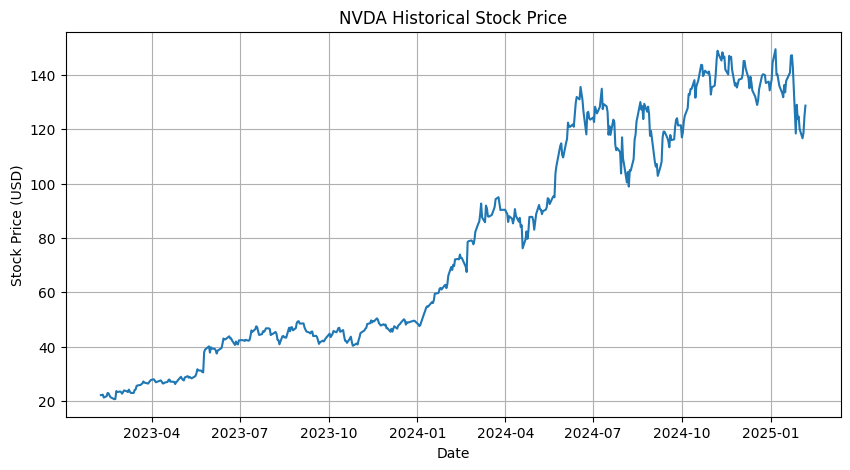

In [6]:
#Visualizing the historical price data for NVDA

#We first download the data for the past two years.
data = yf.download("NVDA", start="2023-02-07", end="2025-02-07", auto_adjust=True)

#Next we plot the data
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title('NVDA Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)

In [8]:
#Attempt 1

#The Black-Scholes model is a mathematical moddel to determine the fair price for a call or a put option based on five variables.
class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma):
        self.S = S        # Underlying asset price
        self.K = K        # Option strike price
        self.T = T        # Time to expiration in years
        self.r = r        # Risk-free interest rate
        self.sigma = sigma  # Volatility of the underlying asset

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def call_option_price(self):
        return (self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0))

#In order to check if the model is correct, let's put some number in the function.
#Then we check if we have the same number that is avaialable on yahoo finance.
#The current time is 10:34am on Satuday, February 8th. The spot price is $129.84 
#For strike price, let's choose $100
#For expiration to time, let's choose 0.5 year because the option pricing data for August 15,2025 is available. 
#The current risk free rate is 4.49% for Feb 07 2025(10 year Treasury Rate)
#As of today (2025-02-08), NVIDIA's volatility is 42.99%

bsm = BlackScholesModel(S=129.84, K=100, T=0.5, r=0.0449, sigma=0.4299)
print(f"Call Option Price: {bsm.call_option_price()}")
print(f"Put Option Price: {bsm.put_option_price()}")

#Since we got out number, let's compare how accurate our number is with the data on yahoo finance. 
#Assume we have the same input/conditon as above.
#The last call option price was 37.85
#The last put option price was 5.39

#The fair option price is close to the actual option price but it is not really precise.
#We can conclude that both the put and call option price are underpriced.

Call Option Price: 35.274384897949574
Put Option Price: 3.2143974956901147


In [9]:
#Calculate the historical volatility of NVDA stock

#There are 252 workdays in the year, so the annualized volatility is calculated by multiplying the square root of 252 by the daily volatility.

def calculate_historical_volatility(stock_data, window=252):
    log_returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    volatility = np.sqrt(window) * log_returns.std()
    return volatility

nvda_volatility = calculate_historical_volatility(data)
print(f"NVDA Historical Volatility: {nvda_volatility}")

NVDA Historical Volatility: Ticker
NVDA    0.511177
dtype: float64


In [10]:
#Attemp2

#Let's see if we get more precise option pricing.
#In attempt 1, I used the volatility of NVDA which I found on website called gurufocus.
#In attempt 2, I used the volatility of NVDA calculated from the past two years data using python.
#Attempt2 is more precise and the error for option pricng is both less than $1
bsm = BlackScholesModel(S=129.84, K=100, T=0.5, r=0.0449, sigma=0.511177)
print(f"Call Option Price: {bsm.call_option_price()}")
print(f"Put Option Price: {bsm.put_option_price()}")

Call Option Price: 37.042485327932056
Put Option Price: 4.982497925672586


In [ ]:
#We have five most used Option Greeks: Delta, Gamma, Theta, Vega, and Rho
#Since Delta is the most important one I am going to create its graph.
#Delta(%) measures the rate of change of the option price with respect to changes in the underlying asset's price
#For call options, delta values range from 0 to 1
#For put options, the range is from -1 to 0.

In [12]:
class BlackScholesGreeks(BlackScholesModel):
    def delta_call(self):
        return si.norm.cdf(self.d1(), 0.0, 1.0)

    def delta_put(self):
        return -si.norm.cdf(-self.d1(), 0.0, 1.0)
    

# Example usage:
bsg = BlackScholesGreeks(S=129.84, K=100, T=0.5, r=0.0449, sigma=0.511177)

print(f"Call Delta: {bsg.delta_call()}")
print(f"Put Delta: {bsg.delta_put()}")

Call Delta: 0.8327985884593427
Put Delta: -0.16720141154065726


In [ ]:
#The importance of Delta

#The absolute value of the Delta tells the approximate probability that the option will finish in-the-money.
#From the calculation above, we can see the absolute value of delta is 83.27% for call and 16.72% for put.
#Therefore, the probability that the call option will finish in-the-money is 83.27% which is very high. 
#If I am a trader, I would absolutely buy the call option.
#I would not buy the put option because the absolute value of delta for put option is 16.72% which is less than 50%

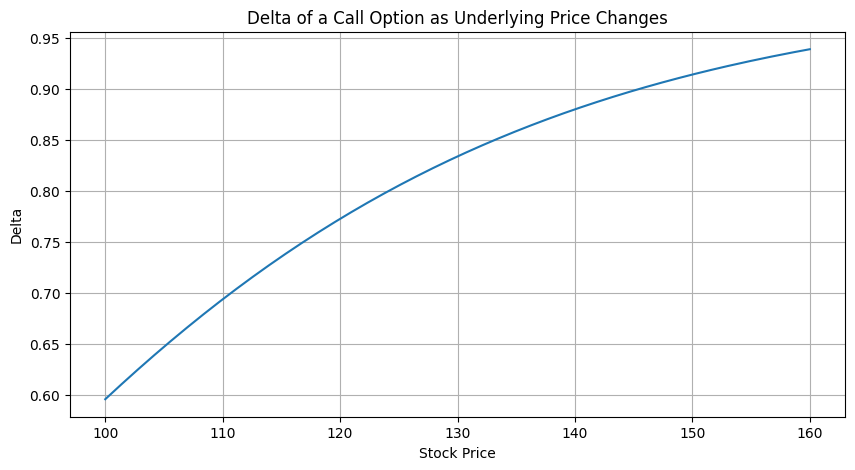

In [13]:
stock_prices = np.linspace(100, 160, 130)
deltas = [BlackScholesGreeks(S=price, K=100, T=0.5, r=0.0449, sigma=0.511177).delta_call() for price in stock_prices]

plt.figure(figsize=(10, 5))
plt.plot(stock_prices, deltas)
plt.title('Delta of a Call Option as Underlying Price Changes')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.grid(True)

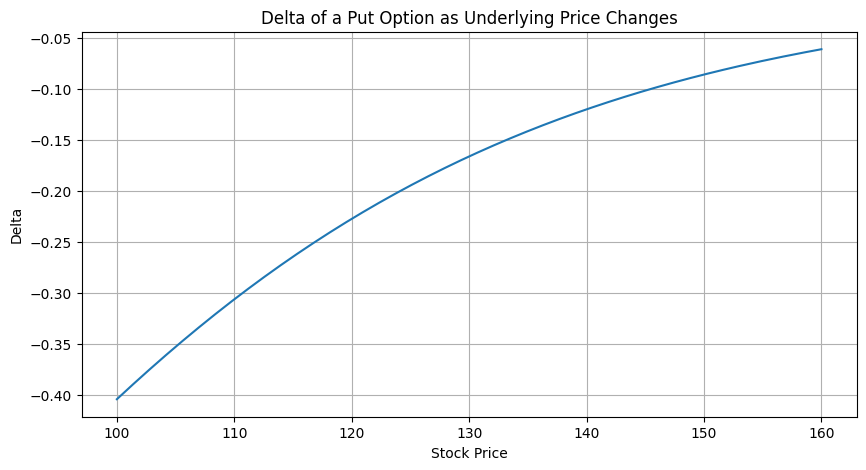

In [14]:
stock_prices = np.linspace(100, 160, 130)
deltas = [BlackScholesGreeks(S=price, K=100, T=0.5, r=0.0449, sigma=0.511177).delta_put() for price in stock_prices]

plt.figure(figsize=(10, 5))
plt.plot(stock_prices, deltas)
plt.title('Delta of a Put Option as Underlying Price Changes')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.grid(True)